<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Clustering-in-Python/blob/master/13_Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gaussian Mixture Model

# Gaussian Mixture Models are probabilistic models
# It use the soft clustering approach for distributing the points in different clusters
# Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, 
# and each of these distributions represent a cluster.
# Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

# Silhouette Score
# Clusters are well apart from each other as the silhouette score is closer to 1
# Silhouette Coefficient score is a metric used to calculate the goodness of a clustering technique 
# Its value ranges from -1 to 1.
# 1: Means clusters are well apart from each other and clearly distinguished.
# 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
# -1: Means clusters are assigned in the wrong way.

In [2]:
# Importing Libraries

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

In [3]:
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Preparing Data
# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
# Now we will separate the target variable from the original dataset 
# And again convert it to an array by using numpy
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
print(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_1 = dict(zip(unique, counts))
freq_1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


{0: 50, 1: 50, 2: 50}

In [6]:
# Filtering Setosa

Setosa = iris_data['Type'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

Filtering Setosa, True means its Setosa and False means Non Setosa
0    True
1    True
2    True
3    True
4    True
Name: Type, dtype: bool
Top 6 Rows of Setosa
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
Last 6 Rows of Setosa
    sepal length (cm)  sepal width (cm)
45                4.8               3.0
46                5.1               3.8
47                4.6               3.2
48                5.3               3.7
49                5.0               3.3


Setosa for 2D Plot
X Axis points
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
Y Axis Points
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]




(2.0, 4.5)

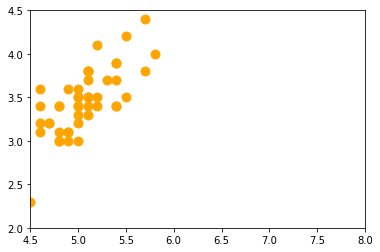

In [7]:
# Filtering Setosa for 2D Plot 

print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0 
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [8]:
# Filtering Versicolour

Versi = iris_data['Type'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())

Filtering Versicolour, True means its Versicolour and False means Non Versicolour
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
50                7.0               3.2
51                6.4               3.2
52                6.9               3.1
53                5.5               2.3
54                6.5               2.8
Last 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
95                5.7               3.0
96                5.7               2.9
97                6.2               2.9
98                5.1               2.5
99                5.7               2.8


Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




(2.0, 4.5)

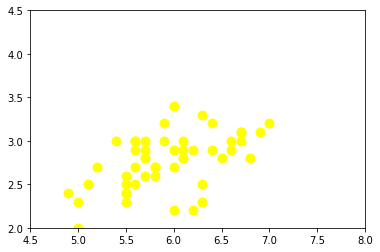

In [9]:
# Filtering Versicolour for 2D Plot 

print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [10]:
# Filtering Virginica

Virginica = iris_data['Type'] == 2
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print(Virginica.head())
print("Top 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2[Virginica_v2.columns[0:2]].head())
print("Last 6 Rows of Virginica")
print(Virginica_v2[Virginica_v2.columns[0:2]].tail())

Filtering Virginica, True means its Virginica and False means Non Virginica
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
100                6.3               3.3
101                5.8               2.7
102                7.1               3.0
103                6.3               2.9
104                6.5               3.0
Last 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0


Virginica for 2D Plot
X Axis points
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
Y Axis Points
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]




(2.0, 4.5)

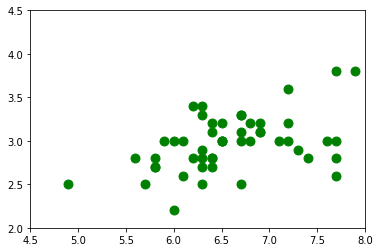

In [11]:
# Filtering Virginica for 2D Plot

print("Virginica for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 2,0])
print("Y Axis Points")
print(iris_X[iris_Y == 2,1])
print('\n')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

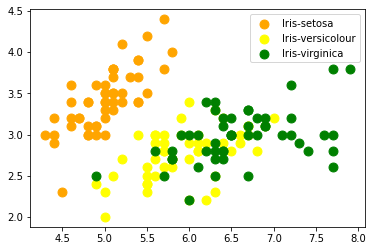

In [12]:
# Visualise Classes all at once

# In this Iris dataset, we have three classes (0,1,2)
# We visualise these classes in a 2-D graph 
# This will help us in comparing the original classes with the clusters created 
# Plot the three type of flowers on a graph

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# We find that we have three classes with two types of Iris flowers overlapping each other

In [13]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
model_gmm = gmm.fit(iris_X)
model_gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
# GMM Output
labels = model_gmm.predict(iris_X)
print("Gaussian Output Clusters")
print(labels)
unique, counts = np.unique(labels, return_counts=True)
pred_2 = dict(zip(unique, counts))
print("Frequency of Gaussian Output Cluster")
print(pred_2)

Gaussian Output Clusters
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Frequency of Gaussian Output Cluster
{0: 50, 1: 55, 2: 45}


Original Cluster Frequency
{0: 50, 1: 50, 2: 50}
GaussianMixture Output Cluster Frequency
{0: 50, 1: 55, 2: 45}
Silhouette Score for 3 Clusters
0.5011761635067201




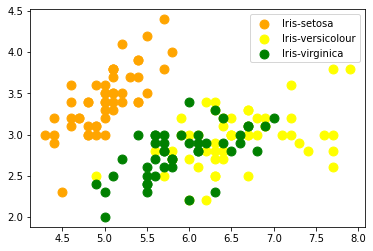

In [15]:
# Visualizing Output

print('Original Cluster Frequency')
print(freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(labels, return_counts=True)
print('GaussianMixture Output Cluster Frequency')
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters')
print(silhouette_score(iris_X,labels))
print('\n')

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

plt.scatter(iris_X[labels == 0, 0], iris_X[labels == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[labels == 1, 0], iris_X[labels == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[labels == 2, 0], iris_X[labels == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# This worked well as only 5 instances/rows are misplaced
# Silhouette Score is 0.50 which is not that bad